<a href="https://colab.research.google.com/github/nsubbaian/FrequentistML/blob/master/Project1/FMLAssignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Frequentist Machine Learning Assigment 1: Linear Regression** 

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sys
from sklearn import linear_model
import statistics 

# Selected Dataset: http://archive.ics.uci.edu/ml/datasets/Forest+Fires
# Dataset Description: https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.names
# Chosen so it's good for regression (with numerical, not categorical features, and the target is a continuous number)

dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

# removed categorical feautures
dataset = dataset.drop(columns = {'month', 'day'})

# Shuffle and then split training data into 80% train, 10% validation and 10% test
training, validation, test = np.split(dataset.sample(frac=1), [int(.8*len(dataset)), int(.9*len(dataset))])
print("Length of dataset:", len(dataset))
print( "Length of training:", len(training))
print("Length of validation:", len(validation))
print("Length of test:", len(test))

training

Length of dataset: 517
Length of training: 413
Length of validation: 52
Length of test: 52


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
133,4,6,93.7,80.9,685.2,17.9,17.6,42,3.1,0.0,0.00
174,1,4,90.2,96.9,624.2,8.9,14.2,53,1.8,0.0,3.50
95,4,4,89.7,90.0,704.4,4.8,17.8,64,1.3,0.0,0.00
52,4,3,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00
292,4,5,91.6,100.2,466.3,6.3,22.9,40,1.3,0.0,2.64
...,...,...,...,...,...,...,...,...,...,...,...
146,5,4,90.1,39.7,86.6,6.2,13.2,40,5.4,0.0,0.95
363,4,3,91.9,111.7,770.3,6.5,15.9,53,2.2,0.0,2.93
265,4,4,93.7,102.2,550.3,14.6,22.1,54,7.6,0.0,0.79
224,7,4,90.1,82.9,735.7,6.2,15.4,57,4.5,0.0,37.71


### A. Plain old linear regression, with no regularization

In [233]:
linTrain_X, linTrain_Y = training.iloc[:, :10], np.log(training.iloc[:, 10]+.01)
linTest_X, linTest_Y = test.iloc[:, :10], np.log(test.iloc[:,10]+.01)

#  Using eq 3.6 to find the betas
beta_hat = np.linalg.inv(linTrain_X.T.dot(linTrain_X)).dot(linTrain_X.T).dot(linTrain_Y)

y_hat = linTest_X.dot(beta_hat)

# mean squared error on the test dataset
MSE = np.square(np.subtract(linTest_Y,y_hat)).mean() 
print("Linear Regression MSE on test set:", MSE)
# display(pd.concat([linTest_Y, y_hat, np.subtract(linTest_Y,y_hat)], axis=1))

Linear Regression MSE on test set: 10.082769945954396


### B. Ridge Regression 

Lambda selected by cross-validation: 0.013000000000000001
MSE with best Lambda on validation set: 20.286378400127052
Ridge Regression MSE on test set: 10.871401222076827


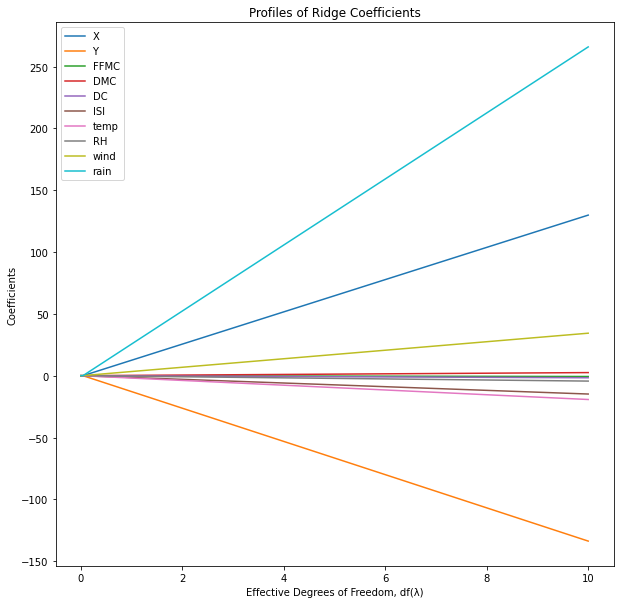

In [234]:
RidgeTrain_X, RidgeTrain_Y = training.iloc[:, :10], np.log(training.iloc[:, 10]+.001)
RidgeVal_X, RidgeVal_Y = validation.iloc[:, :10], np.log(validation.iloc[:, 10]+.001)
RidgeTest_X, RidgeTest_Y = test.iloc[:, :10], np.log(test.iloc[:,10]+.01)
identity = np.identity(RidgeTrain_X.shape[1])
bestMSE = float('inf')
features = list(RidgeTrain_X.columns.values)
X = []
Y = []
MSE_arr = []
bestLambda_arr = []

# normalize input features, this way the penalty is equal per feature
RidgeTrain_X = preprocessing.normalize(RidgeTrain_X)
RidgeVal_X = preprocessing.normalize(RidgeVal_X)
RidgeTest_X = preprocessing.normalize(RidgeTest_X)

for lam in np.arange(0.00, 1, .001):

  # using eq 3.44 to find the betas
  betaRidge_hat = np.linalg.inv((RidgeTrain_X.T.dot(RidgeTrain_X) + lam*(identity))).dot(RidgeTrain_X.T).dot(RidgeTrain_Y)
  y_hat = RidgeVal_X.dot(betaRidge_hat)

  # select the optimal value of Lambda by cross-validation using the validation dataset
  ridgeMSE = np.square(np.subtract(RidgeVal_Y,y_hat)).mean()
  MSE_arr.append(ridgeMSE)
  bestLambda_arr.append(lam)
  if (ridgeMSE < bestMSE):
    bestLambda = lam
    bestMSE = ridgeMSE

print("Lambda selected by cross-validation:", bestLambda)
print("MSE with best Lambda on validation set:", bestMSE)

# Report the mean squared error on the test dataset, using the best lambda you found on the validation set.
# DO NOT USE THE TEST DATASET TO CHOOSE LAMBDA.
betaRidge_hat = np.linalg.inv((RidgeTrain_X.T.dot(RidgeTrain_X) + bestLambda*(identity))).dot(RidgeTrain_X.T).dot(RidgeTrain_Y)
y_hat = RidgeTest_X.dot(betaRidge_hat)
ridgeMSE = np.square(np.subtract(linTest_Y,y_hat)).mean() 
print("Ridge Regression MSE on test set:", ridgeMSE)

# Coefficients plotted as a function of lambda instead of degrees of freedom
for lam in np.arange(0, 10000000, 10000):
  betaRidge_hat = np.linalg.inv((RidgeTrain_X.T.dot(RidgeTrain_X) + lam*(identity))).dot(RidgeTrain_X.T).dot(RidgeTrain_Y)
  dofFreedom = np.matrix(RidgeTrain_X.dot(np.linalg.inv((RidgeTrain_X.T.dot(RidgeTrain_X) + lam*(identity))).dot(RidgeTrain_X.T)))
  X.append(dofFreedom.trace()[0,0])
  Y.append(betaRidge_hat)

plt.figure(figsize=(10,10))
for i in range(0,10):
  plt.plot(X, list(map(list, zip(*Y)))[i], label = features[i] )
plt.legend()
plt.title("Profiles of Ridge Coefficients")
plt.xlabel('Effective Degrees of Freedom, df(λ)')
plt.ylabel('Coefficients') 
plt.show()

### C. Lasso Regression

In [ ]:
LassoTrain_X, LassoTrain_Y = training.iloc[:, :10], np.log(training.iloc[:, 10]+.001)
LassoVal_X, LassoVal_Y = validation.iloc[:, :10], np.log(validation.iloc[:, 10]+.001)
LassoTest_X, LassoTest_Y = test.iloc[:, :10], np.log(test.iloc[:,10]+.01)

# normalize input features, this way the penalty is equal per feature
LassoTrain_X = preprocessing.normalize(LassoTrain_X)
LassoVal_X = preprocessing.normalize(LassoVal_X)
LassoTest_X = preprocessing.normalize(LassoTest_X)

# using sci-kit learn or MATLAB

# select the optimal value of lambda as in part B.

# Display a Lasso plot (there are built in functions for Lasso plot in sci-kit/MATLAB). 

# Which features did the Lasso select for you to include in your model? Do these features make sense?


In [ ]:
# Compute the MSE on the training dataset and the test dataset for all methods and comment on the results.  


# Feeling brave? Do Lasso and Ridge plots(like figures 3.8 and 3.10).